In [10]:
import pandas as pd
import numpy as np
import techniques
import matplotlib.pyplot as plt

In [11]:
bcancer_df = pd.read_csv("breast_cancer.csv")
bcancer_df = bcancer_df.sample(frac=1).reset_index(drop=True)
bcancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,907367,B,10.030,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,...,28.94,69.92,376.3,0.11260,0.07094,0.01235,0.02579,0.2349,0.08061,NaN
1,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.111800,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,NaN
2,909410,B,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.026520,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,NaN
3,911673,B,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,...,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698,NaN
4,9110732,M,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.082930,...,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,90944601,B,13.780,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,...,17.50,97.90,706.6,0.10720,0.10710,0.03517,0.03312,0.1859,0.06810,NaN
565,89827,B,11.060,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.033410,...,19.90,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080,NaN
566,908445,M,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,...,30.93,145.30,1603.0,0.13900,0.34630,0.39120,0.17080,0.3007,0.08314,NaN
567,894326,M,18.220,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.079500,...,25.00,140.90,1485.0,0.14340,0.27630,0.38530,0.17760,0.2812,0.08198,NaN


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bcancer_df['diagnosis'] = np.where(bcancer_df['diagnosis'] == 'M', 1, -1)
column_sels = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'texture_worst', 'perimeter_worst', 'area_worst']
bcancer_df.loc[:, column_sels] = scaler.fit_transform(bcancer_df.loc[:, column_sels])
bcancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,907367,-1,-1.163689,0.463168,-1.185414,-0.988579,0.08117,0.03912,0.00247,0.005159,...,0.531323,-1.112239,-0.886486,0.11260,0.07094,0.01235,0.02579,0.2349,0.08061,NaN
1,846226,1,1.432201,1.282296,1.665360,1.331355,0.09740,0.24580,0.20650,0.111800,...,0.694167,1.323647,0.793551,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,NaN
2,909410,-1,-0.030472,-0.844644,-0.097993,-0.137624,0.07966,0.05581,0.02087,0.026520,...,-1.036863,-0.319638,-0.336962,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,NaN
3,911673,-1,-0.064554,-0.621245,-0.123531,-0.157817,0.06828,0.05319,0.02224,0.013390,...,-0.631382,-0.180538,-0.284225,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698,NaN
4,9110732,1,1.028901,2.033938,1.043388,0.929199,0.09997,0.13140,0.16980,0.082930,...,2.094623,1.135996,0.978132,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,90944601,-1,-0.098636,-0.814392,-0.148245,-0.196212,0.08817,0.06718,0.01055,0.009937,...,-1.331610,-0.278832,-0.305847,0.10720,0.10710,0.03517,0.03312,0.1859,0.06810,NaN
565,89827,-1,-0.871154,-1.007538,-0.843535,-0.799162,0.10330,0.09097,0.05397,0.033410,...,-0.940785,-0.819147,-0.774507,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080,NaN
566,908445,1,1.332796,0.623736,1.307005,1.294382,0.10180,0.13890,0.15940,0.087440,...,0.855382,1.133017,1.269946,0.13900,0.34630,0.39120,0.17080,0.3007,0.08314,NaN
567,894326,1,1.162387,-0.097655,1.101054,1.058322,0.09746,0.11170,0.11300,0.079500,...,-0.110282,1.001959,1.062512,0.14340,0.27630,0.38530,0.17760,0.2812,0.08198,NaN


In [13]:
y = np.array(bcancer_df['diagnosis'])
col_sel = bcancer_df.columns[2 : -1]
x = np.array(bcancer_df[col_sel])

In [14]:
#p_n = int(await input("Type how many neurons do you want to use in the hidden layer : "))
p_n = 100
keep_val = np.arange(start = 0.45, stop = 1, step = 0.01)
best_keep, best_acc, arr_ret = techniques.grid_searchCV_pruning(xin = x, yin = y, p = p_n, keep_rate = keep_val, CV_groups = 20, classification = True)

The model with best accuracy has the mean accuracy : 0.8776061776061777
The model parameters with best accuracy is using keep_rate : 0.8200000000000003


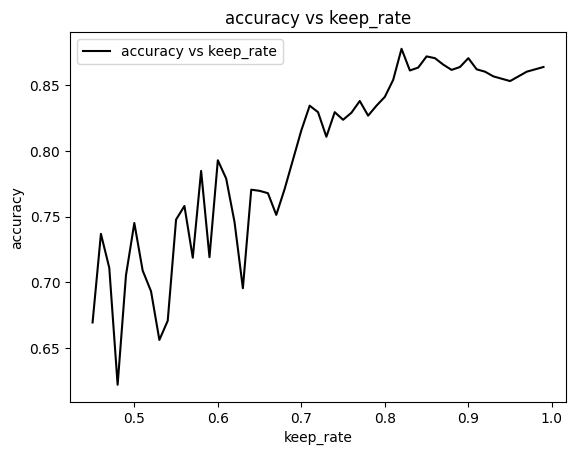

In [15]:
x_plot = np.arange(start = 0.45, stop = keep_val[keep_val.shape[0] -1], step = 0.01)
plt.plot(x_plot, arr_ret, color = 'black', label = 'accuracy vs keep_rate')
plt.title('accuracy vs keep_rate')
plt.xlabel('keep_rate')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.8)

In [17]:
ret = techniques.train_ELM_PRUNING(xin = X_train, yin = y_train, p = p_n, keep_rate = best_keep, control = True)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

A acurácia é de 80.7017543859649%


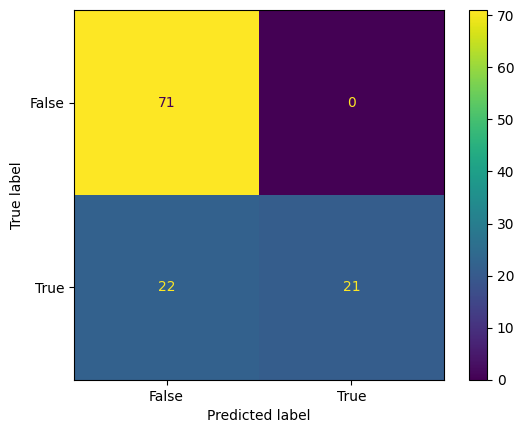

In [18]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, classification = True, control = True)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
acc_ = accuracy_score(y_test, y_pred)
print(f"A acurácia é de {acc_*100}%")
plt.show()